# Probabilidade

### Conceitos básicos

### Espaço amostral
O espaço amostral de um experimento, representado por $\Omega$, é simplesmente o conjunto que inclui todos os resultados possíveis desse experimento.

### Probabilidade Clássica ou de Laplace

Em um experimento randomizado com um espaço amostral em que todos os resultados são equiprováveis, a probabilidade de Laplace é usada para calcular a probabilidade de um evento $A$. A fórmula associada a esta abordagem é a seguinte:

$$ P(A) = \frac{\#(A)}{\#(\Omega)} $$

onde:
- $\#(A)$ representa o número de resultados favoráveis ​​ao evento $A$,
- $\#(\Omega)$ é o número total de resultados possíveis no espaço amostral.

### Regras de Probabilidade
Sejam $A$ e $B$ eventos:
1. $0 \leq P(A) \leq 1$.
2. $P(A \cup B) = P(A) + P(B) - P(A \cap B)$.
3. $P(A^c) = 1 - P(A)$.
4. $P(\emptyset) = 0$.

### Probabilidade Condicional
Suponha que $P(B) > 0$. Definimos a probabilidade condicional de $A$ dado $B$ como:

$$ P(A|B) = \frac{P(A \cap B)}{P(B)} $$


### Eventos mutuamente exclusivos

Dois eventos são **mutuamente exclusivos** (ou disjuntos) se não puderem ocorrer simultaneamente. Ou seja, se um evento ocorrer, o outro não poderá ocorrer. A probabilidade de intersecção de dois eventos mutuamente exclusivos é zero.

Matematicamente, dois eventos $A$ e $B$ são mutuamente exclusivos se:

$$ P(A \cap B) = 0 $$

Se A e B são eventos mutuamente exclusivos, então a probabilidade conjunta de A e B é a soma das probabilidades individuais:

$$P(A \cup B)= P(A)+P(B)$$.




### Eventos Independentes

Dois eventos são **independentes** se a ocorrência de um não afeta a ocorrência do outro. Em outras palavras, o fato de um evento ocorrer não altera a probabilidade de o outro evento ocorrer.

Matematicamente, dois eventos $A$ e $B$ são independentes se:

$$P(A \cap B) = P(A) \cdot P(B) $$



Se dois eventos A e B são independentes então

$$ P(A|B) = P(A)$$

O acima pode ser interpretado como: Se A e B são independentes, então a ocorrência de B não afeta a probabilidade de A.


### Teorema da Probabilidade Total
Suponha que $A_1$ , $A_2$ e $B$ sejam eventos em um espaço amostral $E$ tal que $E=A_1\cup A_2$ e $A_1\cap A_2=\emptyset$. Então

 $$P(B)=P(B|A_1)P(A_1)+P(B|A_2)P(A_2)$$




Considere o banco de dados retirado do Kaggle:(Obesity Levels) no qual o exemplo a seguir será executado.


https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels


In [3]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
from scipy.stats import skewnorm # Necessário para fazer o gráfico de tendenciosidade.
from scipy import stats

#Carregamos o banco de dados baixado anteriormente na pasta de trabalho.
df = pd.read_csv('./ObesityLevels.csv')
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Exemplo 1:

Se for selecionado um indivíduo que participou do estudo Obesidade Leve, determine

a) Qual é a probabilidade de ela ser mulher?

b) Qual é a probabilidade de ele ser um homem?

c) Qual é a probabilidade de ele fumar?

d) Qual é a probabilidade de ela ser mulher e fumar?

e) Se se sabe que a pessoa selecionada é mulher, qual a probabilidade de ela fumar?

#### Solução:
Denotamos como M, H e F os eventos em que ao selecionar aleatoriamente um participante do estudo, esse participante é mulher, homem e fuma respectivamente.

a)

$$P(M)=\frac{ Não.Mulheres}{ Total de participantes}= \frac{1043}{2111}=2,02$$

b) A probabilidade de ser um homem pode ser calculada como

$$P(H)= 1-P(M)=$$

c) $$P(F)=\frac{\text{Número de fumantes}}{\text{Total de participantes}}$$

d) $$P(M\cap F)= \frac{\text{Número de mulheres que fumam}}{\text{Total de participantes}}$$

e) Neste caso é uma probabilidade condicional:

$$ P(F|M)=\frac{P(M\cap F)}{P(M)} $$

In [4]:

#a)
df_female = df[df['Gender']=='Female']
n_female=df_female.shape[0]

P_M =df_female.shape[0]/df.shape[0]

print(f"A probabilidade de ela ser mulher é P(M)={P_M: .2f}")

#b) P_H

P_H= 1-P_M
print(f"A probabilidade de ser um homem é P(H)={P_H: .2f}")


#c) Filtramos o dataframe deixando apenas fumantes

df_smoker = df[df['SMOKE']=='yes']
n_smoker=df_smoker.shape[0]
#Calculamos a probabilidade de ser fumante:
P_F =n_smoker/df.shape[0]

print(f"A probabilidade de ser fumante é P(F)={P_F: .2f}")


#d) Filtramos o dataframe
df_female_smoker = df[(df['Gender']=='Female') & (df['SMOKE']=='yes')]
n_female_smoker = df_female_smoker.shape[0]
P_MF=n_female_smoker/df.shape[0]
print(f"A probabilidade de ela ser mulher e fumar é P(MF)={P_MF: .3f}")


#e)
P_conditional_F_given_M = P_MF/P_M
print(f"A probabilidade de ela fumar, dado que é mulher, é P(F|M)={P_conditional_F_given_M: .3f}")

#Observemos como esta última probabilidade aumenta na presença de novas informações.

A probabilidade de ela ser mulher é P(M)= 0.49
A probabilidade de ser um homem é P(H)= 0.51
A probabilidade de ser fumante é P(F)= 0.02
A probabilidade de ela ser mulher e fumar é P(MF)= 0.007
A probabilidade de ela fumar, dado que é mulher, é P(F|M)= 0.014


### Exemplo 2:

Uma empresa oferece aos seus clientes a possibilidade de contratar um empréstimo para veículo e um empréstimo educacional. Um estudo mostra que a probabilidade de um cliente contrair um empréstimo para um veículo é de 0,35, a probabilidade de um cliente contrair um empréstimo educacional é de 0,46 e a probabilidade de um cliente contrair pelo menos um dos dois empréstimos é de 0,59. Encontre a probabilidade de um cliente contrair empréstimos para veículos e empréstimos educacionais.

#### Solução:

Usamos a fórmula de probabilidade:
$$P(A\cup B)=P(A)+P(B)−P(A\cap B)$$

Resolvemos para $P(A \cap B)$:

$$P(A\cap B)=P(A)+P(B)−P(A\cup B)$$


In [5]:
# Probabilidades dadas
P_A = 0.35  # Probabilidade de contratar um empréstimo de veículo
P_B = 0.46  # Probabilidade de tomar um empréstimo educacional
P_A_union_B = 0.59  # Probabilidade de contrair pelo menos um dos empréstimos

# Calcule a probabilidade de tomar ambos os empréstimos
P_A_inter_B = P_A + P_B - P_A_union_B

print(f"A probabilidade de um cliente contrair ambos os empréstimos é: {P_A_inter_B:.2f}")


A probabilidade de um cliente contrair ambos os empréstimos é: 0.22


### Exemplo 3:

Em uma pesquisa realizada em uma empresa, são considerados dois eventos independentes: A e B. Se a probabilidade de ocorrência do evento A for 0,4 e a probabilidade de ocorrência de pelo menos um dos eventos for 0,6, encontre a probabilidade de ocorrência do evento A. evento b.

In [6]:
# Probabilidades dadas
P_A = 0.4  # Probabilidade de ocorrência do evento X
P_A_union_B = 0.6  # Probabilidade de pelo menos um dos eventos ocorrer

# Calcule a probabilidade de ocorrência do evento Y.
P_B = (P_A_union_B - P_A) / (1 - P_A)


print(f"A probabilidade de ocorrência do evento B é: {P_B:.3f}")


A probabilidade de ocorrência do evento B é: 0.333


### Exemplo 4:

Dado que $P(A \cup B) = 0,7$ e $P(A\cup B^c) = 0,9$ encontre $P(A)$.

#### Solução:

Como $P(A^c \cap B^c ) =P((A\cup B)^c) = 1 - P(A\cup B) =1-0,7 = 0,3 $ e da mesma forma
$P(A^c \cap B) = 1-P(A \cup B ^c) = 1-0,9 = 0,1$.

Assim $ P(A^c ) =P(A^c \cap B^c) +P(A^c \cap B) = 0,3 + 0,1 = 0,4$,

$P(A) = 1-0,4 =0,6$

### Exemplo 5:

Considere dois eventos aleatórios A e B com $P(A) = 1/2$, $P(B) = 1/3$, $P(A\cap B)= 1/4$. Determinar

-$P(A|B)$
-$P(B|A)$
- A probabilidade conjunta de $A$ e $B$.


#### Solução:

a)$
P(A|B)=\frac{P(A\cap B)}{P(B)}=\frac{1/4}{1/3}=\frac{3}{4}
$

b)$
P(B|A)=\frac{P(A\cap B)}{P(A)}=\frac{1/4}{1/2}=\frac{1}{2}
$

c)
$
P(A\cup B)= P(A)+P(B)-P(A\cap B)=\frac{1}{2}+\frac{1}{3}-\frac{1}{ 4}=\frac{7}{12}
$

### Exemplo 6:

Em uma escola, os alunos podem optar por estudar como idioma
estrangeiro inglês ou francês. Em um determinado curso, $90\%$ dos alunos estudam inglês e o restante francês. $30\%$ dos que estudam inglês são homens e $40\%$ dos que estudam francês são homens. Uma aluna é escolhida aleatoriamente, qual a probabilidade dela ser mulher?

#### Solução:

Seja F= o aluno estuda francês, I= o aluno estuda inglês, H= o aluno é homem e M= o aluno é mulher. Então
$$P(H)=P(H|I)P(I)+P(H|F)P(F)= 0,3*0,9+0,4*0,1= 0,31$$

do complemento segue que $$P(M)=1-P(H)=1-0,31=0,69$$


### Exemplo 7:

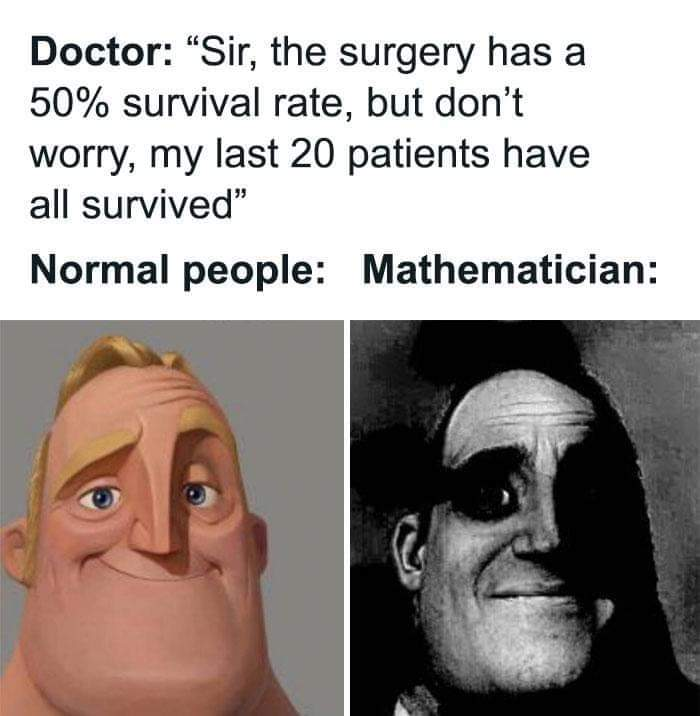


### Solução:



Vamos considerar os seguintes eventos:

**A**: É o evento em que um paciente submetido a uma cirurgia sobrevive. Por tanto

$$P(A) = 0,5$$

Vamos considerar a probabilidade de 20 pacientes sobreviverem. Seja **B** o evento em que 20 pacientes sobrevivem:

Portanto, como a sobrevivência de cada paciente é independente do restante dos pacientes, podemos aplicar a independência de eventos para concluir
 $$
 P(B) = (0,5)^{20}\approx 9,54 \times 10^{-7} = 0,000000954
 $$


Esta é uma probabilidade extremamente baixa.


### Conclusão:
Um matemático entende que 20 pacientes sobreviveram à cirurgia, isso não indica que o próximo paciente tenha maior probabilidade de sobreviver. Na verdade, a probabilidade de o paciente 21 sobreviver ainda é de 0,5

Concluindo, embora uma pessoa normal possa considerar a informação tranquilizadora, um matemático vê a baixa probabilidade de 20 pacientes consecutivos sobreviverem e entende que este facto não altera a probabilidade inerente de cirurgia para o próximo paciente.

### Exemplo 8:

 O problema de Monty Hall é um problema matemático de probabilidade inspirado no game show da televisão americana *Let's Make a Deal*. O nome do problema vem do nome do apresentador do game show: Monty Hall. (Foi um programa famoso nos Estados Unidos entre $1963$ e $1984$).

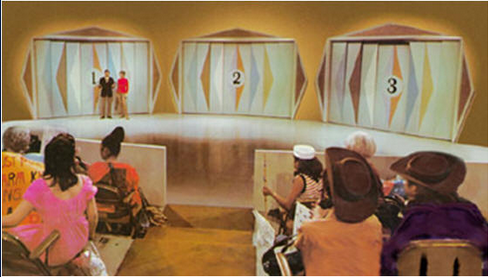

O problema é este: o participante tem três portas para escolher. Atrás de uma das portas está um carro e atrás de cada uma das outras está uma cabra. O participante escolhe uma porta, mas antes de abri-la, o apresentador, que sabe o que está atrás de cada uma, abre uma das duas (que o participante não escolheu) atrás da qual claro está uma cabra, e então lhe dá a oportunidade para alterar a escolha para o participante. Naturalmente, o participante quer levar o carro, o que deve ser feito para aumentar as chances de ganhar, trocar de porta ou não trocar? Tanto faz?

O link a seguir ilustra o problema de forma didática:

[$\text{O problema de Monty Hall}$](https://www.youtube.com/watch?v=aTu0gEmscVk)

Mesmo na série *Numbers* este problema também é referido:

[$\text{Serie Numbers}$](http://www.youtube.com/watch?v=pqJBTWoIkbA)

### Solução:

Vamos usar a probabilidade condicional para determinar se é melhor ou não mudar de porta. Suponha que o competidor selecione a porta 1. Considere os eventos:

- $A_1$: O competidor seleciona a porta 1 e vence.
- $B$: O apresentador abre uma porta contendo uma cabra.

#### Probabilidade de ganhar se mudarmos ou não:

 **Sabemos que:**
 - $ P(A_1)= \frac{1}{3} $.
 -$P(B)= 1$. Monty sempre abrirá uma porta com uma cabra, sabendo onde está o carro.



Observe que se o competidor não mudar de porta após a porta que contém a cabra ter sido aberta, obtemos que
$$
P(A_1 | B) = \frac{P(B | A_1) \cdot P(A_1)}{P(B)} = \frac{1 \cdot \frac{1}{3}}{1}= \frac{1}{3}
$$
A probabilidade de ganhar o carro se não trocarmos é simplesmente a probabilidade inicial de escolhermos corretamente, ou seja:

$$
P(A_1 | B) = P(A_1)
$$

Se o competidor mudar de porta após a porta que contém a cabra ter sido aberta, obtemos que
$$
P(A_1^c | B) = \frac{P(B | A_1^c) \cdot P(A_1^c)}{P(B)} = \frac{1 \cdot \frac{2}{3} }{1}= \frac{2}{3}
$$

### Conclusão:

- A probabilidade de ganhar o carro se mudarmos é $\frac{2}{3}$.
- A probabilidade de ganhar o carro se não mudarmos é $\frac{1}{3}$.

Portanto, **é melhor trocar de porta**, pois as chances de ganhar o carro são duas vezes maiores na troca (66,67%) do que na não troca (33,33%).


# Tabela de opções para o problema de Monty Hall

| Escolha Inicial | Porta com Prêmio | Não mudar | Alterar |
|------------------|-------------------|---------- --|---------|
| Porta 1 | Porta 1 | **Ganha** | Cabra |
| Porta 1 | Porta 2 | Cabra |**Ganha** |
| Porta 1 | Porta 3 | Cabra | **Ganha** |
| Porta 2 | Porta 1 | Cabra | **Ganha** |
| Porta 2 | Porta 2 | **Ganha** | Cabra |
| Porta 2 | Porta 3 | Cabra | **Ganha** |
| Porta 3 | Porta 1 | Cabra | **Ganha** |
| Porta 3 | Porta 2 | Cabra | **Ganha** |
| Porta 3 | Porta 3 | **Ganha** | Cabra |
| **Total de Vitórias** | |**3 Vitórias: (1/3)** |**6 Vitórias: (2/3)** |